# Das Perzeptron

Mit der Erkennung handgeschriebener Ziffern haben wir bereits ene erste nicht-triviale Aufgabe mit Hilfe von Verfahren der Künstlichen Intelligenz gelöst. Mit Hilfe des Software-pakets scikit-learn war die buchstäblich ein Einzeiler: Mit dem einfachen Aufruf __perceptron.fit(X,y)__ haben wir die gesamte Arbeit erledigt. Das neuronale Netz, das hinter dem Perzeptron steckt, hat in Sekundenbruchteilen seine inneren parameter an die übergebenen Trainsdaten angepasst. Danach konnten wir mit __perceptron.predict(x)__ einzelne Pixel-Grafiken übergeben und erhielten mit etwa 90 % Wahrscheinlichkeit (ermittelt durch __perception.score(X_test, y_test)__) einen korrekten Wert. Dies mag nicht viel erscheinen; 100 % wären uns natürlich lieber, aber das ist eigentlich unmöglich - selbst ein Mensch wird einen kleinen Teil der Zeichen falsch interpretieren, z. B. bei einer teilweisen undeutlichen Handschrift. Es gibt aber wesentlich bessere Verfahren, bei denen der Fehlerprozentsatz viel niedriger ist. 

Die Bibliothek scikit-learn enthält zahlreiche Implementierungen gängiger Verfahren der KI, deren Wirkungsweise uns beim Aufruf verborgen bleieben. Das __Perzeptron__ ist für uns augenblicklich nur eine _Black Box_. Wir werden einen Blick in diese Black Box werfen und danach mit einefachen Mitteln ein Perzeptron aufbauen, dass unsere Aufgabe der Handschrifterkennung mit etwa 95 % Trefferquote lösen wird.

Wir beginnen mit der einfachsten Form des Perzeptrons, das bereits in den 1950er jahren entwickelt wurde.

## Das einschichtige Perzeptron

Die Idee der Neuronalen Netze in der Computerwissenschaft ist schon recht alt.  Sie ist eine Vereinfachung der 

### Wirkungsweise natürlicher Neuronen

Die Neuronen des menschlichen Gehirns sind hochgradig vernetzt; jedes der etwa 100 Milliarden Neuronen ist mit Tausenden anderer Neuronen verbunden und tauscht elektrische Signale aus. Diese Signale erreichen das Neuron über die _Synapsen_ und werden im Körper des Neurons akkumuliert; sobald ein Schwellenwert überschritten wird, entlädt sich das Neuron über sein _Axon_ und erzeugt daduch einen  elektrischen Impuls, der über die _Dendriten_, in die sich das Axon aufteilt, andere neuronen erreicht. Diese Funktionsweise ist recht einfach; trotzdem sind durch die gewaltige Zahl der Neuronen und die starke Vernetzung komplexe Operationen möglich, obwohl jedes Neuon nur über sehr beschränkte "Rechenleistung" verfügt.

### Das einfachste Perzeptron

Um die Wirkungsweise zu verstehen, untersuchen wir das einfachste Neuron, das man sich vorstellen kann. Damit gelangt man zum __Perzeptron__:
Das einfachste Perzeptron besteht aus einem Neuron mit zwei Eingängen (Denditen/Synapsen) und einem Ausgang (Axon). Je nach Eingabesignalen soll das Neuron nun 0 oder 1 als Ausgangssignal liefern, nach folgendem Algorithmus:

1. Bilde eine _gewichtete Summe_ aus den beiden Eingabesignalen
2. Liegt die Summe über einem _Schwellenwert_, so liefere den Wert 1 als Ausgangsignal; ansonsten eine 0

Nennen wir die beiden Eingabesignale $x_1$ und $x_2$. Für die Summenbildung in 1. benötigen wir als Parameter die beiden  __Gewichte__ $w_1$ und $w_2$. Die gewichtete Summe ist dann $w_1 x_1 + w_2 x_2$. Liegt diese Summe in 2. über dem __Schwellenwert__ $s$, so liefert der Ausgang den Wert 1, ansonsten die 0. Man sagt auch: *Das Neuron feuert*, sobald der Schwellenwert überschritten ist. Damit ergibt sich für den __Output__ $o$  die

### Perzeptron-Regel
$$
o(x_1,x_2) = \left\{
\begin{array}{ll}
1 & \text{für}\; w_1 x_1 + w_2 x_2 > s \\
0 & \text{für}\;w_1 x_1 + w_2 x_2 \leq s \\
\end{array}
\right. 
$$

### Schwellenwert und Bias

Statt eines Schwellenwerts kann man auch einen __Bias__ $b$ einführen, der durch $b := -s$ definiert wird. Offensichtlich ist dann

$$ w_1 x_1 + w_2 x_2 > s  \Leftrightarrow w_1 x_1 + w_2 x_2 + b > 0 $$

Erst durch den Bias wird es möglich, dass das Perzeptron auch dann eine 1 liefert, wenn an beiden Eingängen eine 0 anliegt: Man arbeitet dann mit einem positiven Bias. 

Wir können also die Perzeptron-Regel formulieren als

#### Perzeptron-Regel (mit Bias)

$$
o(x_1, x_2) = \left\{
\begin{array}{ll}
1 & w_1 x_1 + w_2 x_2 + b> 0 \\
0 & w_1 x_1 + w_2 x_2 +b\leq 0 \\
\end{array}
\right. 
$$

Den Bias kann man sich als immer vorhandenes Eingangssignal vorstellen (_Grundrauschen_), das durch ein fiktives drites Eingangsneuron erzeugt wird. Der Bias ist nun neben den Gewichten der dritte Parameter.



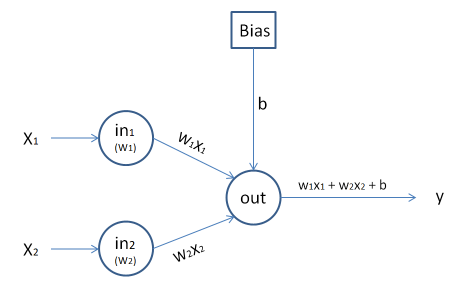

### Implementierung in Python

Das einfache Perzeptron besteht aus den drei Werten für die beiden Gewichte und den Bias. Implementieren wir einmal das Perzeptron als Klasse in Python:

In [1]:
class Perzeptron:
    def __init__(self,w1,w2,b):
        self.w1 = w1
        self.w2 = w2
        self.b = b

    def output(self,x1, x2):
        return 1 if self.w1 * x1 + self.w2 * x2 + self.b > 0 else 0

Wählen wir einmal als Eingabedaten die folgenden Werte, die die Eckpunkte eines Quadrats definieren:

In [2]:
X = [[0,0],[0,1],[1,0],[1,1]]

Wir erstellen eine kleine Funktion, um ein Perzeptron mit den Eingabedaten zu füttern und das Ergebnis anzeigen zu lassen:

In [3]:
def test(perzeptron, input):
    for inp in input:
        print(f'{inp} -> {perzeptron.output(*inp)}')

Wir testen nun unser Perzeptron an einem einfachen Beispiel. Dabei setzen wir als Gewichte an den beiden Eingängen jeweils eine 1 und den Bias auf 0:

In [4]:
p = Perzeptron(1,1,0)
test(p,X)

[0, 0] -> 0
[0, 1] -> 1
[1, 0] -> 1
[1, 1] -> 1


Im Beispiel des Perzeptrons mit den Werten $w_1=w_2 =1, b=0$ erhalten wir als Output genau dann eine 1, wenn mindestens ein Input-Signal gleich 1 ist. Das ist genau die Definition der ODER-Verknüfung.

Das Perzeptron kann als logisches Gatter gedacht werden, mit dem logische Verknüpfungen wie UND und ODER realisiert werden können. Dazu werden die entsprechenden Werte an an die Eingabe-Neuronen $x_1,x_2$ angelegt und der y-Ausgang verarbeitet. 

### Das Perzeptron lernt...

Der Berechnungs-Algorithmus des Perzeptron ist denkbar einfach; trotzdem können wir damit Eingabewerte klassifizieren, wenn Gewichte und Bisas richtig gewählt werden. Aber wie erreichen wir es, dass das Perzeptron diese Werte selbständig bestimmt?

Wir _trainieren_ das Perzeptron wie folgt: Wir legen Testeingabedaten an die Eingabeneuronen an. Entspricht die Ausgabe dem erwarteten Ergebnis, so bleiben die Gewichte und der Bias unverändert. Bei einem abweichenden Ergebnis werden die Gewichte nach oben bzw. nach unten wie folgt korrigiert:

#### Der Lern-Algorithmus

$$
\begin{equation}
\begin{split}
w_{1,2} &\rightarrow w_{1,2}, b \rightarrow  b\;\;\text{(falls Output wie erwartet)} \\ 
w_{1,2} &\rightarrow  w_{1,2} + x_{1,2},  b \rightarrow  b + \alpha \;\;\text{(falls 1 erwartet, aber Output 0)}\\
w_{1,2} &\rightarrow  w_{1,2} - x_{1,2}, b \rightarrow  b - \alpha \;\;\text{(falls 0 erwartet, aber Output 1)}\\
\end{split}
\end{equation}
$$


Hierbei sind $x_k, y$ die Testdaten und $\alpha \ll 1$ eine Lernrate. Ist $o$ der Output des Perzeptrons, so lässt sich dies vereinfachen zu

$$
\begin{equation}
\begin{split}
w_{1,2} &\rightarrow w_{1,2} +  (y - o) x_{1,2}\\
b &\rightarrow b +  (y -o )
\end{split}
\end{equation}
$$
da $y - o =0\;\; \text{oder} \pm 1$ ist.

### Implementierung der Lernregel

Wir erweitern unsere Klasse um die beschriebene Lernregel:

In [5]:
class Perzeptron:
    def __init__(self):
        self.w1 = 0
        self.w2 = 0
        self.b = 0

    def output(self,x1, x2):
        return 1 if self.w1 * x1 + self.w2 * x2 + self.b > 0 else 0

    def lernschritt(self, x, y):
        x1, x2 = x
        o = self.output(x1, x2)  
        self.w1 += (y - o) * x1
        self.w2 += (y - o) * x2        
        self.b  += (y - o) * 1
    
    def train(self, X, Y, alpha=1, maxiter=100):
        for _ in range(maxiter):
            for x, y in zip(X,Y):
                self.lernschritt(x, y)


### Training und Test

Wir testen unser erweitertes, selbstlernendes Perzeptron mit Hilfe einer kleinen Funktion:

In [6]:
def train_und_test(name,X, Y):
    p = Perzeptron()
    p.train(X,Y)
    print(f'{name}: ')
    print(f'Gewichte= {p.w1}, {p.w2}, Bias = {p.b}\n')
    for x, y in zip(X, Y):
        o = p.output(x[0],x[1])
        check = '\u2713' if o == y else '\u21af'
        print(f'{x[0]},{x[1]} -> {y}, Output: {o}   {check}')
    print('\n')

Als Testdaten verwenden wir wieder die vier Eckpunkte des Quadrats und wählen als Ausgabewerte die logischen Verknüfungen UND, NICHT-UND, ODER und XODER dar.

In [7]:
X = [[0,0],[0,1],[1,0],[1,1]]

Y_und   = [0, 0, 0, 1]
Y_nund  = [1, 1, 1, 0]
Y_oder  = [0, 1, 1, 1]
Y_xoder = [0, 1, 1, 0]

train_und_test('UND-Verknüpfung',X,Y_und)
train_und_test('NICHT-UND-Verknüpfung',X,Y_nund)
train_und_test('ODER-Verknüpfung',X,Y_oder)
train_und_test('XODER-Verknüpfung',X,Y_xoder)

UND-Verknüpfung: 
Gewichte= 2, 1, Bias = -2

0,0 -> 0, Output: 0   ✓
0,1 -> 0, Output: 0   ✓
1,0 -> 0, Output: 0   ✓
1,1 -> 1, Output: 1   ✓


NICHT-UND-Verknüpfung: 
Gewichte= -2, -1, Bias = 3

0,0 -> 1, Output: 1   ✓
0,1 -> 1, Output: 1   ✓
1,0 -> 1, Output: 1   ✓
1,1 -> 0, Output: 0   ✓


ODER-Verknüpfung: 
Gewichte= 1, 1, Bias = 0

0,0 -> 0, Output: 0   ✓
0,1 -> 1, Output: 1   ✓
1,0 -> 1, Output: 1   ✓
1,1 -> 1, Output: 1   ✓


XODER-Verknüpfung: 
Gewichte= -1, 0, Bias = 1

0,0 -> 0, Output: 1   ↯
0,1 -> 1, Output: 1   ✓
1,0 -> 1, Output: 0   ↯
1,1 -> 0, Output: 0   ✓




Die ersten drei Verknüpfungen werden ´korrekt erlernt, mit den angezeigten Gewicheten und Bias. Bei der XODER-Verknüpfung gibt es jedoch kein korrektes Ergebnis. Eine Analyse zeigt, dass das einfache zweischichtige Perzeptron diese Aufgabe grundsätzlich nicht lösen kann. Wir werden dies gleich genauer untersuchen.

### Zur Geschichte des Verfahrens

* Die Perzeptron-Regel wurde bereits Ende der 1940er Jahre aufgestellt, nach dem Vorbild natürlicher neuronaler Netze. Sie zeigt prinzipiell, dass aus einem sehr einfache Rechenverfahren - Berechnung einer gewichteten Summe  und Vergleich mit einem Schwellenwert - eine logische Schaltung aufgebaut werden kann, die durch hochgradige Vernetzung auch komplexeste Rechenvorgänge ermöglicht.

* Die Lernregel wurde einige jahre später aufgestellt. Auch sie orientiert sich an biologischen Vorgängen.

* Das XOR-Problem zusammen mit weiteren Schwierigkeiten nach der ersten Euphorie in den 1960er  zu einem starken Nachlassen des Interesses an der Erforschung künstlicher Intelligenz, was als erster **KI-Winter** bezeichnet wird.

* Die Lösung des **XOR-Problems** liegt in der Verwendung weiterer Schichten von Neuronen und nicht-linearer Funktionen, und sie führte zur Entwicklung der heute verwendeten Künstlichen Neuronalen Netze.

# Zusammenfassung

### Links

[1] [Das Perzeptron bei Wikipedia](https://de.wikipedia.org/wiki/Perzeptron)